# GDV Plots

Ziel dieses Notebooks ist es, die Daten des F1 Datensatzes zu visualisieren.

## LE 1: Grundlagen der Visualisierung und Diagrammtypen

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructors = pd.read_csv('constructors.csv')
circuits = pd.read_csv('circuits.csv')
drivers_standing = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

drivers_standing = drivers_standing.merge(
    drivers,         # Die zweite Tabelle, die du zusammenfügen möchtest
    on='driverId',   # Die Spalte, über die verknüpft wird
    how='left',      # Typ der Verknüpfung: 'left' stellt sicher, dass alle Einträge aus drivers_standing erhalten bleiben
    suffixes=('_standing', '_drivers')  # Suffixe zur Unterscheidung von Spalten, die in beiden Tabellen vorkommen
)

### Abbildung 1

C:\Users\Adrian Meier\AppData\Local\Temp\ipykernel_9340\2935337236.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


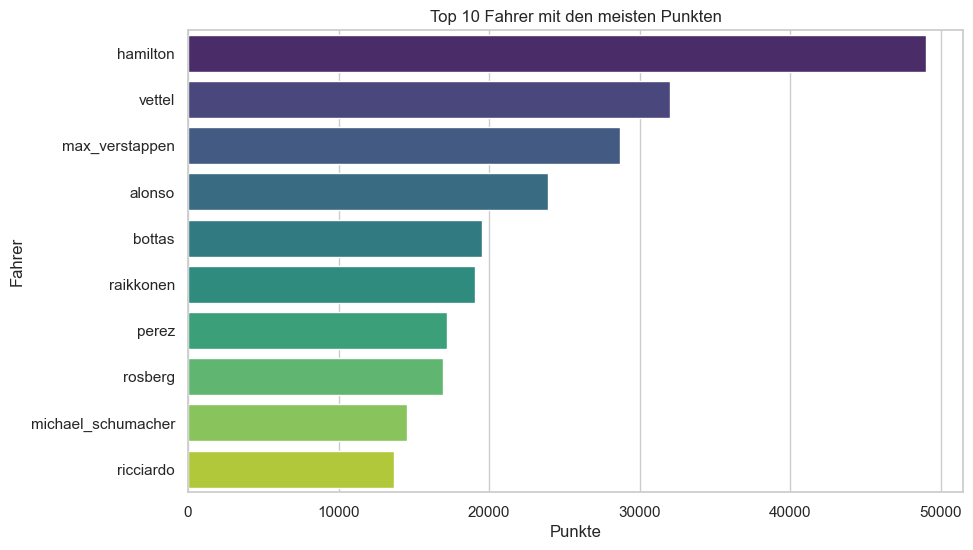

,driverId,driverRef,points
0,1,hamilton,49022.5
19,20,vettel,32026.0
821,830,max_verstappen,28687.5
3,4,alonso,23879.0
813,822,bottas,19541.0


In [4]:
# Erstellen einer Tabelle mit den meisten Punkten insgesamt
most_points = (drivers_standing.groupby(['driverId', 'driverRef'])['points']
               .sum()
               .reset_index()
               .sort_values(by='points', ascending=False))

# Für eine schönere Darstellung mit Seaborn-Stil
sns.set_theme(style="whitegrid")

# Wähle die Top 10 Fahrer mit den meisten Punkten
top_10_points = most_points.head(10)

# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(
    x='points', 
    y=top_10_points['driverRef'], 
    data=top_10_points,
    palette='viridis'
)

# Diagramm anpassen
plt.title('Top 10 Fahrer mit den meisten Punkten')
plt.xlabel('Punkte')
plt.ylabel('Fahrer')

# Diagramm anzeigen
plt.show()

most_points.head()

### Abbildung 2

   raceId    surname  points           race_name
0    1074    Leclerc    26.0  Bahrain Grand Prix
1    1074      Sainz    18.0  Bahrain Grand Prix
2    1074   Hamilton    15.0  Bahrain Grand Prix
3    1074    Russell    12.0  Bahrain Grand Prix
4    1074  Magnussen    10.0  Bahrain Grand Prix
5    1074     Bottas     8.0  Bahrain Grand Prix
6    1074       Ocon     6.0  Bahrain Grand Prix
7    1074    Tsunoda     4.0  Bahrain Grand Prix
8    1074     Alonso     2.0  Bahrain Grand Prix
9    1074       Zhou     1.0  Bahrain Grand Prix


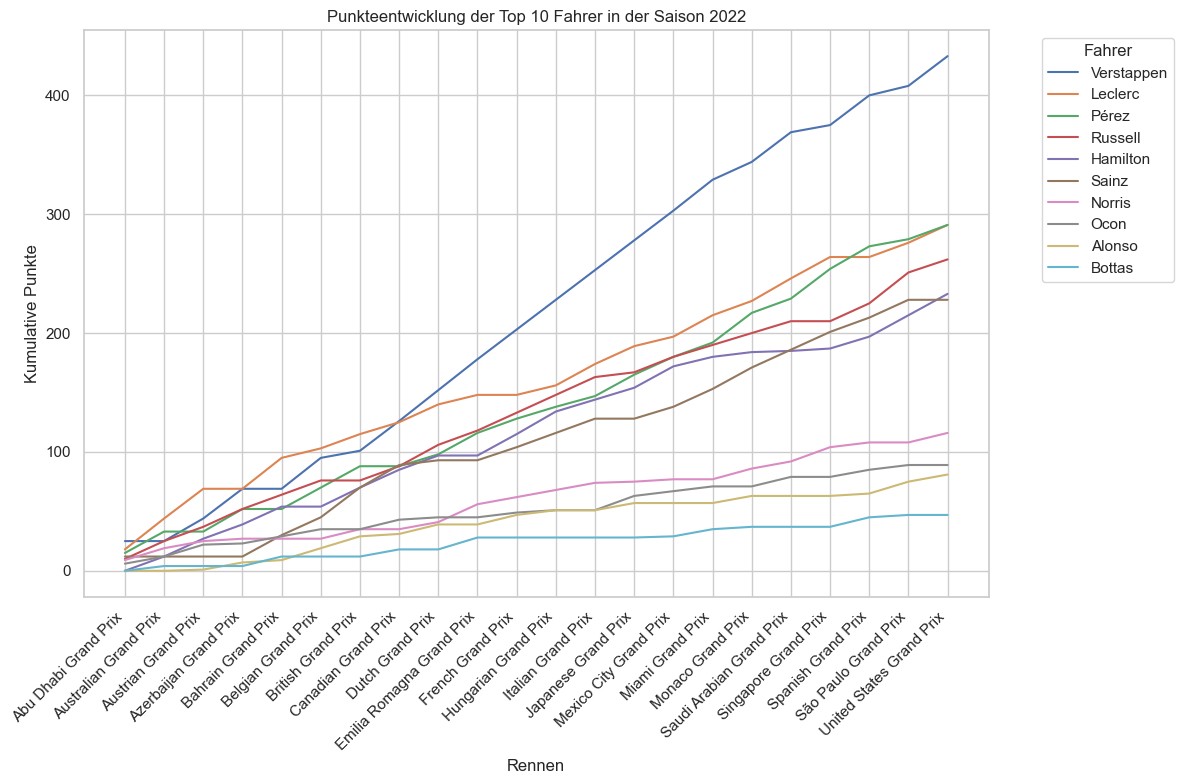

In [5]:
# Erstellen einer Tabelle mit Punkten in der Saison 2023 pro rennen

# Merge der 
races_2022 = races[races['year'] == 2022]
results_2022 = results[results['raceId'].isin(races_2022['raceId'])]
results_2022 = results_2022.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
results_2022 = results_2022[['raceId', 'surname', 'points']]
results_2022 = results_2022.merge(races_2022[['raceId', 'name']], on='raceId', how='left')
results_2022 = results_2022.rename(columns={'name': 'race_name'})
results_2022 = results_2022.sort_values(by=['raceId', 'points'], ascending=[True, False])
print(results_2022.head(10))

driver_points = results_2022.groupby(['surname', 'race_name'])['points'].sum().unstack().fillna(0).cumsum(axis=1)

top_10_drivers = driver_points.iloc[:, -1].nlargest(10).index

top_10_points = driver_points.loc[top_10_drivers]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_10_points.T, dashes=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rennen")
plt.ylabel("Kumulative Punkte")
plt.title("Punkteentwicklung der Top 10 Fahrer in der Saison 2022")
plt.legend(title="Fahrer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Abbildung 3

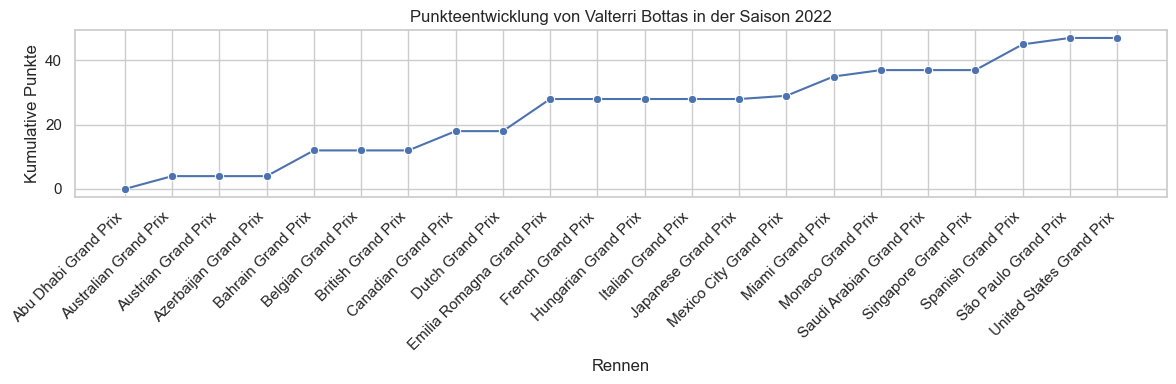

In [6]:
# Entwicklung der Punkte von Valterri Bottas in der Saison 2022
bottas_points = driver_points.loc['Bottas']
plt.figure(figsize=(12, 4))
sns.lineplot(data=bottas_points, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rennen")
plt.ylabel("Kumulative Punkte")
plt.title("Punkteentwicklung von Valterri Bottas in der Saison 2022")
plt.tight_layout()
plt.show()

## LE 2 Visuelle Wahrnehmung

### Abbildung 4

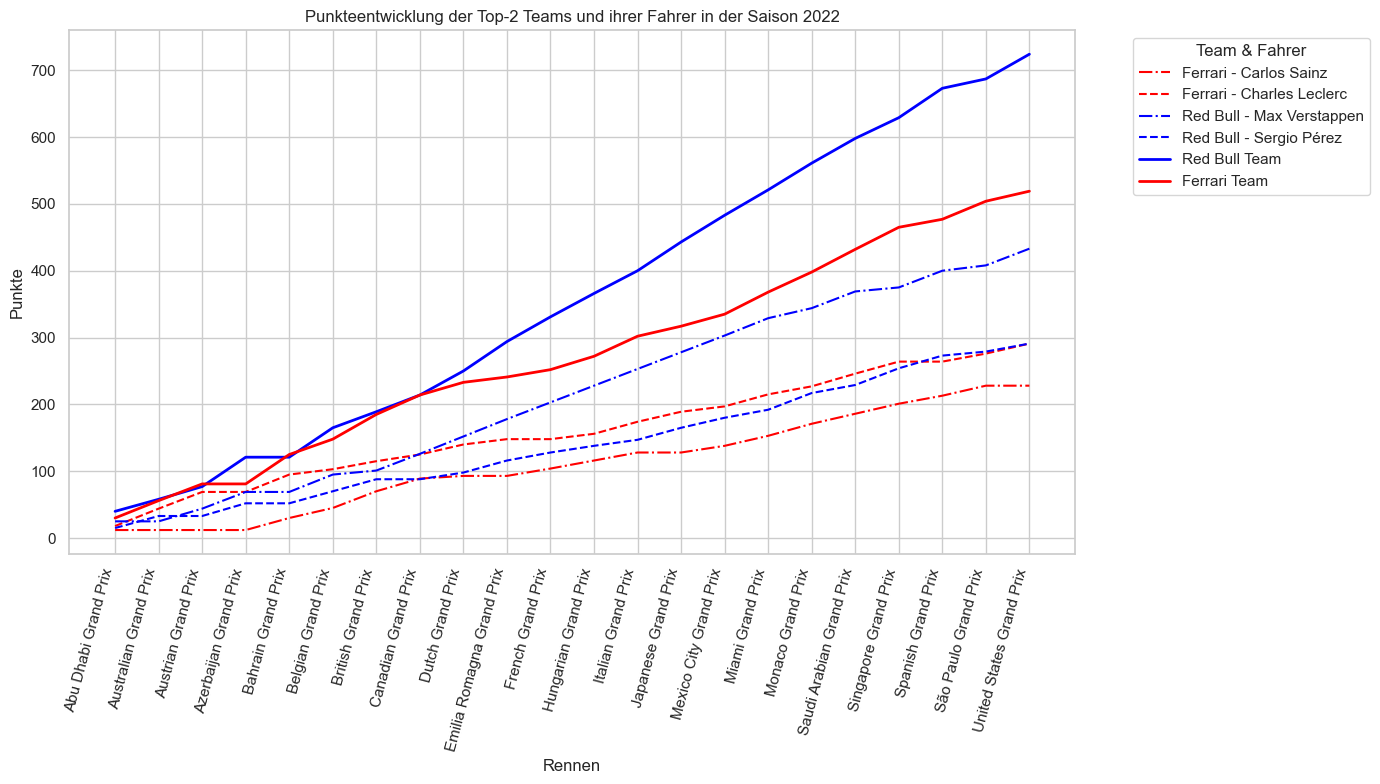

In [7]:
# Lade die Daten
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')
drivers = pd.read_csv('drivers.csv')

# Filtere die Rennen für das Jahr 2022
races_2022 = races[races['year'] == 2022]

# Verknüpfe die Rennergebnisse mit den Rennnamen (Jahr 2022)
results_2022 = results.merge(races_2022[['raceId', 'name']], on='raceId', how='inner')

# Umbenennen der Spalte 'name' zu 'race_name'
results_2022.rename(columns={'name': 'race_name'}, inplace=True)

# Verknüpfe mit den Teamnamen
results_2022 = results_2022.merge(constructors[['constructorId', 'name']], on='constructorId', how='inner')

# Umbenennen der Spalte 'name' zu 'team_name'
results_2022.rename(columns={'name': 'team_name'}, inplace=True)

# Verknüpfe mit den Fahrerinformationen (aus der 'drivers' Tabelle)
results_2022 = results_2022.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='inner')

# Erstelle eine neue Spalte für den vollständigen Namen des Fahrers
results_2022['driver_name'] = results_2022['forename'] + ' ' + results_2022['surname']

# Berechne die Punkte pro Team und Fahrer
results_2022['team_driver'] = results_2022['team_name'] + " - " + results_2022['driver_name']

# Aggregiere die Punkte pro Team und Fahrer für jedes Rennen
team_driver_points = results_2022.groupby(['team_name', 'driver_name', 'raceId', 'race_name'])['points'].sum().reset_index()

# Sortiere nach Rennen und berechne kumulierte Punkte für jedes Team und Fahrer
team_driver_points = team_driver_points.sort_values(by=['team_name', 'race_name'])
team_driver_points['cumulative_points'] = team_driver_points.groupby(['team_name', 'driver_name'])['points'].cumsum()

# Berechne die Gesamtpunkte für jedes Team und wähle die Top-3 Teams
team_total_points = team_driver_points.groupby('team_name')['cumulative_points'].max().nlargest(2).index.tolist()

# Filtere die Punkteentwicklung für nur die Top-3 Teams und ihre Fahrer
top_teams_points = team_driver_points[team_driver_points['team_name'].isin(team_total_points)]

# Berechne die Teampunkte (Team-Punkte aus den einzelnen Fahrern pro Rennen)
team_points_per_race = results_2022.groupby(['team_name', 'raceId', 'race_name'])['points'].sum().reset_index()

# Berechne die kumulierten Teampunkte
team_points_per_race = team_points_per_race.sort_values(by=['team_name', 'race_name'])
team_points_per_race['cumulative_points'] = team_points_per_race.groupby('team_name')['points'].cumsum()

# Bestimme spezifische Farben für Ferrari und Red Bull sowie andere Teams
team_color_map = {
    'Ferrari': 'red',  # Ferrari Rot
    'Red Bull': 'blue'  # Red Bull Blau
}

# Füge für andere Teams eine generische Farbe hinzu
other_teams = [team for team in team_total_points if team not in team_color_map]
other_colors = sns.color_palette("Set2", len(other_teams))
for i, team in enumerate(other_teams):
    team_color_map[team] = other_colors[i]

# Erstelle den Plot
plt.figure(figsize=(14, 8))

# Iteriere über jedes Team und jeden Fahrer und plotte die kumulierten Punkte
for team in top_teams_points['team_name'].unique():
    team_data = top_teams_points[top_teams_points['team_name'] == team]
    drivers = team_data['driver_name'].unique()

    # Verwende verschiedene Linientypen für die Fahrer im gleichen Team
    linestyles = ['-.', '--']
    for i, driver in enumerate(drivers):
        driver_data = team_data[team_data['driver_name'] == driver]
        plt.plot(driver_data['race_name'], driver_data['cumulative_points'],
                 label=f"{team} - {driver}",
                 color=team_color_map[team],
                 linestyle=linestyles[i % len(linestyles)])

# Plot der Team-Punkte mit durchgezogenen Linien für die Teams
for team in team_total_points:
    team_data = team_points_per_race[team_points_per_race['team_name'] == team]
    if team in ['Ferrari', 'Red Bull']:  # Durchgezogene Linie für Ferrari und Red Bull
        plt.plot(team_data['race_name'], team_data['cumulative_points'],
                 label=f"{team} Team",
                 color=team_color_map[team], linestyle='-', linewidth=2)

# Diagrammanpassungen
plt.xticks(rotation=75, ha='right')
plt.ylabel("Punkte")
plt.xlabel("Rennen")
plt.title("Punkteentwicklung der Top-2 Teams und ihrer Fahrer in der Saison 2022")

# Legende anpassen
plt.legend(title="Team & Fahrer", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout optimieren
plt.tight_layout()
plt.show()


## LE 3 Designprinzipien vs. Daten

### Abbildung 6

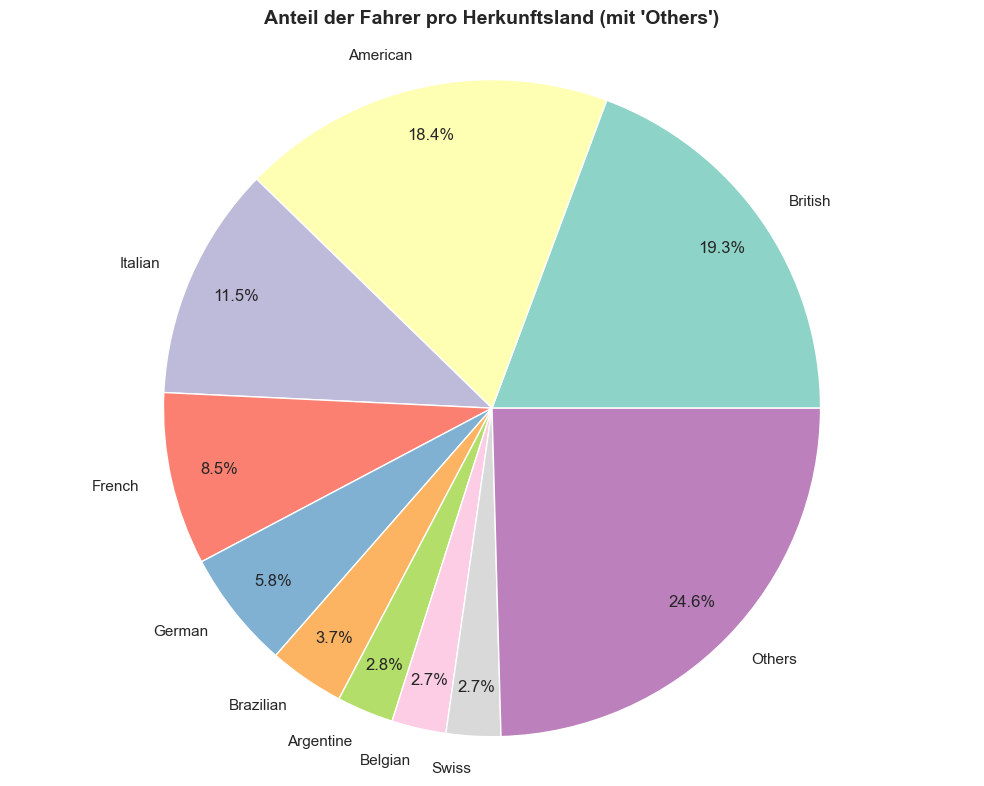

In [8]:
# Lade die Daten
drivers = pd.read_csv('drivers.csv')

# Zähle die Anzahl der Fahrer pro Herkunftsland
country_counts = drivers['nationality'].value_counts()

# Berechne den Grenzwert für die unteren 25%
threshold = country_counts.sum() * 0.25
cumulative_sum = 0
other_countries = []

# Iteriere über die Länder absteigend nach Häufigkeit und füge die Länder mit den kleinsten Anteilen zur "Others"-Kategorie hinzu
for country, count in country_counts.iloc[::-1].items():
    if cumulative_sum + count > threshold:
        break
    cumulative_sum += count
    other_countries.append(country)

# Entferne die kleinen Länder und erstelle die "Others"-Kategorie
country_counts_revised = country_counts.drop(other_countries)
country_counts_revised['Others'] = cumulative_sum

# Erstelle eine Farbpallette
colors = sns.color_palette("Set3", len(country_counts_revised))

# Erstelle das Kuchendiagramm
plt.figure(figsize=(10, 8))
plt.pie(
    country_counts_revised,
    labels=country_counts_revised.index,
    autopct='%1.1f%%',
    colors=colors,
    pctdistance=0.85
)

# Titel und Optimierung
plt.title("Anteil der Fahrer pro Herkunftsland (mit 'Others')", fontsize=14, fontweight='bold', y = 1.02)
plt.axis('equal')  # Um das Diagramm kreisförmig zu machen
plt.tight_layout()
plt.show()

### Abbildung 7

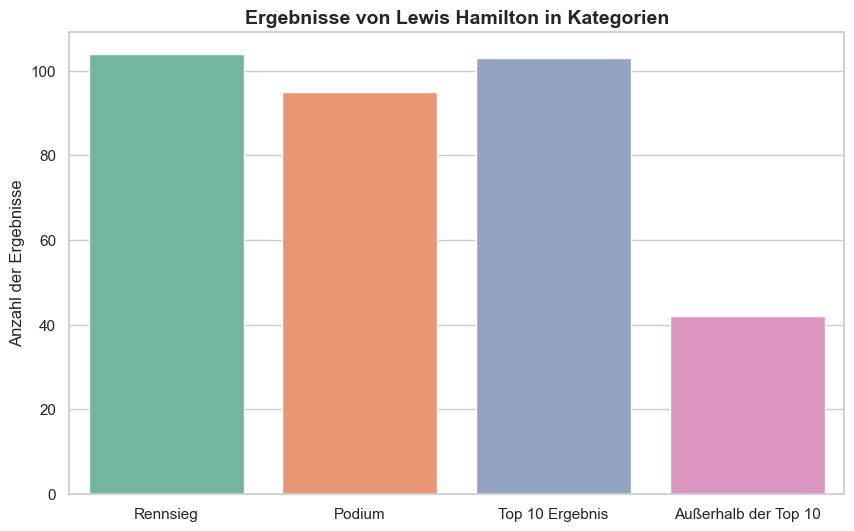

In [9]:
# Daten laden
results = pd.read_csv('results.csv')
drivers = pd.read_csv('drivers.csv')

# Finde die driverId für Lewis Hamilton
hamilton_id = drivers[(drivers['forename'] == 'Lewis') & (drivers['surname'] == 'Hamilton')]['driverId'].values[0]

# Filtere die Ergebnisse für Lewis Hamilton
hamilton_results = results[results['driverId'] == hamilton_id].copy()  # Kopie des DataFrames erstellen

# Definiere die Kategorien
def categorize_result(position):
    if position == 1:
        return "Rennsieg"
    elif position in [2, 3]:
        return "Podium"
    elif position <= 10:
        return "Top 10 Ergebnis"
    else:
        return "Außerhalb der Top 10"

# Kategorisiere die Ergebnisse für Hamilton (mit loc)
hamilton_results.loc[:, 'Kategorie'] = hamilton_results['positionOrder'].apply(categorize_result)

# Zähle die Häufigkeit der Kategorien
category_counts = hamilton_results['Kategorie'].value_counts().reindex(["Rennsieg", "Podium", "Top 10 Ergebnis", "Ausserhalb der Top 10"])

# Erstelle den Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette="Set2", legend=False)

# Anpassen der Achsen und Titel
plt.xlabel("", fontsize=12)
plt.ylabel("Anzahl der Ergebnisse", fontsize=12)
plt.title("Ergebnisse von Lewis Hamilton in Kategorien", fontsize=14, fontweight='bold')
plt.show()

### Abbildung 8

C:\Users\Adrian Meier\AppData\Local\Temp\ipykernel_9340\3813568914.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hamilton_driver_id = drivers[drivers['forename'] == 'Lewis'][drivers['surname'] == 'Hamilton']['driverId'].values[0]
C:\Users\Adrian Meier\AppData\Local\Temp\ipykernel_9340\3813568914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamilton_results['placement'] = hamilton_results['positionText'].apply(pd.to_numeric, errors='coerce')


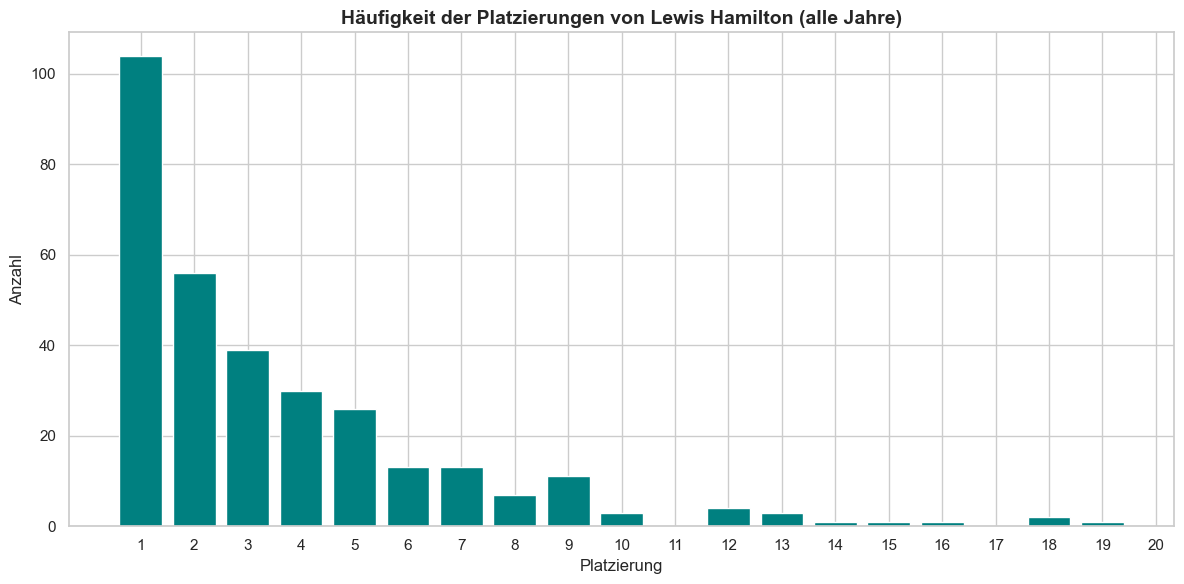

In [10]:
# Lade die Daten
results = pd.read_csv('results.csv')  # Lade die results.csv-Datei
drivers = pd.read_csv('drivers.csv')  # Lade die drivers.csv-Datei

# Finde die 'driverId' von Lewis Hamilton in der 'drivers'-Tabelle
hamilton_driver_id = drivers[drivers['forename'] == 'Lewis'][drivers['surname'] == 'Hamilton']['driverId'].values[0]

# Filtere die 'results' für Lewis Hamilton
hamilton_results = results[results['driverId'] == hamilton_driver_id]

# Möglicherweise müssen wir den 'positionText' in numerische Platzierungen umwandeln
# Die 'positionText'-Spalte enthält die Positionen wie "1", "2", "3" usw.
hamilton_results['placement'] = hamilton_results['positionText'].apply(pd.to_numeric, errors='coerce')

# Zähle die Häufigkeit der Platzierungen 1 bis 20
placement_counts = hamilton_results['placement'].value_counts().sort_index()

# Wir wollen nur Platzierungen von 1 bis 20 anzeigen, andere Platzierungen ignorieren
placement_counts = placement_counts[placement_counts.index <= 20]

# Erstelle das Balkendiagramm
plt.figure(figsize=(12, 6))
plt.bar(placement_counts.index, placement_counts.values, color='teal')

# Diagrammanpassungen
plt.title('Häufigkeit der Platzierungen von Lewis Hamilton (alle Jahre)', fontsize=14, fontweight='bold')
plt.xlabel('Platzierung', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)
plt.xticks(range(1, 21))  # Platzierungen von 1 bis 20 auf der X-Achse anzeigen

# Optimierung des Layouts
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### Abbildung 9

C:\Users\Adrian Meier\AppData\Local\Temp\ipykernel_9340\2853964730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pit_stops_2022['seconds'] = pit_stops_2022['milliseconds'] / 1000


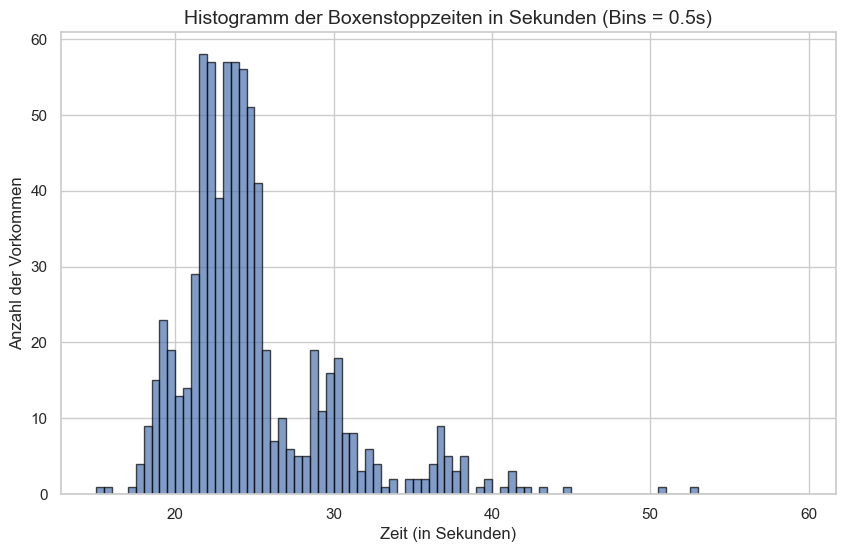

In [11]:
# Lade die pit_stop-Daten und races-Daten
pit_stops = pd.read_csv('pit_stops.csv')  # Pfad zu deiner Datei
races = pd.read_csv('races.csv')  # Lade die races.csv-Datei

# Filtere nach den Rennen der Saison 2022
races_2022 = races[races['year'] == 2022]

# Füge die Renndaten (raceId und Jahr) zu den pit stop-Daten hinzu
pit_stops_2022 = pit_stops[pit_stops['raceId'].isin(races_2022['raceId'])]

# Wandle Millisekunden in Sekunden um
pit_stops_2022['seconds'] = pit_stops_2022['milliseconds'] / 1000

# Erstellen des Histogramms mit numpy für eine kontinuierliche Range
plt.figure(figsize=(10, 6))
plt.hist(pit_stops_2022['seconds'], bins=np.arange(15, 60, 0.5), edgecolor='black', alpha=0.7)

# Titel und Beschriftungen hinzufügen
plt.title('Histogramm der Boxenstoppzeiten in Sekunden (Bins = 0.5s)', fontsize=14)
plt.xlabel('Zeit (in Sekunden)', fontsize=12)
plt.ylabel('Anzahl der Vorkommen', fontsize=12)

# Anzeigen des Histogramms
plt.show()

## LE 4 Grammatik von Grafiktools

### Abbildung 10

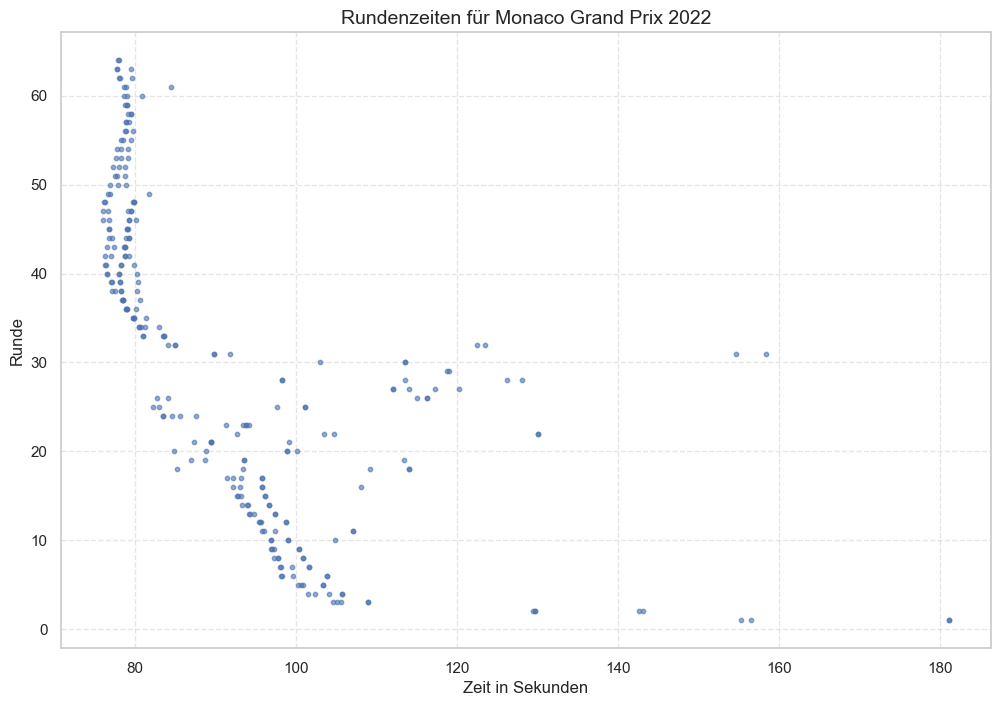

In [53]:
# Lade die Daten
lap_times = pd.read_csv('lap_times.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
constructors = pd.read_csv('constructors.csv')

# Wähle das Jahr und den Grand Prix aus
year = 2022
grand_prix_name = 'Monaco Grand Prix'  # Beispiel Grand Prix

# Filtere das Rennen für das angegebene Jahr und Grand Prix
race_id = races[(races['year'] == year) & (races['name'] == grand_prix_name)]['raceId'].values[0]

# Bestimme die Teams (z. B. Red Bull und Williams)
selected_teams = ['Red Bull', 'Williams']
selected_team_ids = constructors[constructors['name'].isin(selected_teams)]['constructorId']

# Filtere nach den Rundenzeiten der Fahrer in den gewählten Teams und Rennen
results_filtered = results[(results['raceId'] == race_id) & (results['constructorId'].isin(selected_team_ids))]
driver_ids = results_filtered['driverId']

# Filtere die Rundenzeiten für das ausgewählte Rennen, die relevanten Fahrer und Zeiten <= 200 Sekunden
lap_times_filtered = lap_times[
    (lap_times['raceId'] == race_id) &
    (lap_times['driverId'].isin(driver_ids)) &
    (lap_times['milliseconds'] <= 200000)  # Filter für Zeiten <= 200 Sekunden
]

# Füge die Teamnamen zu den gefilterten Rundenzeiten hinzu
lap_times_filtered = lap_times_filtered.merge(results[['driverId', 'constructorId']], on='driverId')
lap_times_filtered = lap_times_filtered.merge(constructors[['constructorId', 'name']], on='constructorId')
lap_times_filtered = lap_times_filtered.rename(columns={'name': 'Team'})
lap_times_filtered = lap_times_filtered.drop_duplicates()
lap_times_filtered = lap_times_filtered[lap_times_filtered['Team'].isin(selected_teams)]

# Erstelle den Scatterplot für die Teams mit getauschten Achsen
plt.figure(figsize=(12, 8))

# Scatterplot der Rundenzeiten in Sekunden auf der X-Achse und der Rundenanzahl auf der Y-Achse
plt.scatter(lap_times_filtered['milliseconds'] / 1000, lap_times_filtered['lap'], alpha=0.6, s=10)

# Titel und Achsenbeschriftungen hinzufügen
plt.title(f'Rundenzeiten für {grand_prix_name} {year}', fontsize=14)
plt.xlabel('Zeit in Sekunden', fontsize=12)
plt.ylabel('Runde', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

# Plot anzeigen
plt.show()

### Abbildung 11

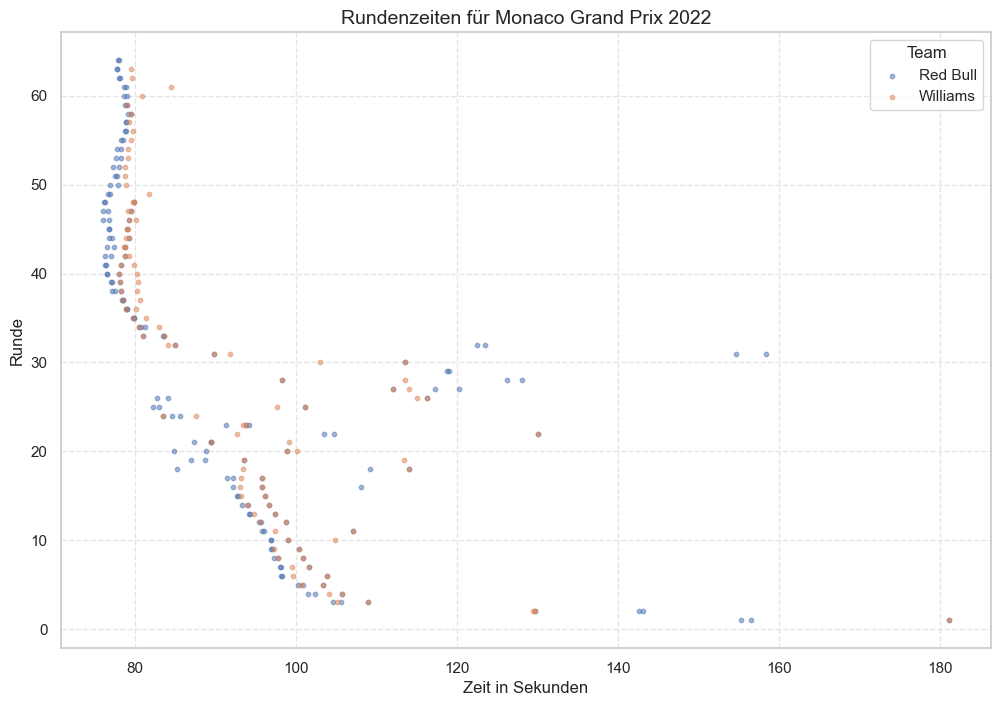

In [54]:
# Erstelle den Scatterplot für die vier Teams mit getauschten Achsen
plt.figure(figsize=(12, 8))
for team in selected_teams:
    team_data = lap_times_filtered[lap_times_filtered['Team'] == team]
    plt.scatter(team_data['milliseconds'] / 1000, team_data['lap'], label=team, alpha=0.5, s = 10)

# Titel und Achsenbeschriftungen hinzufügen
plt.title(f'Rundenzeiten für {grand_prix_name} {year}', fontsize=14)
plt.xlabel('Zeit in Sekunden', fontsize=12)
plt.ylabel('Runde', fontsize=12)
plt.legend(title='Team')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot anzeigen
plt.show()

### Abbildung 12

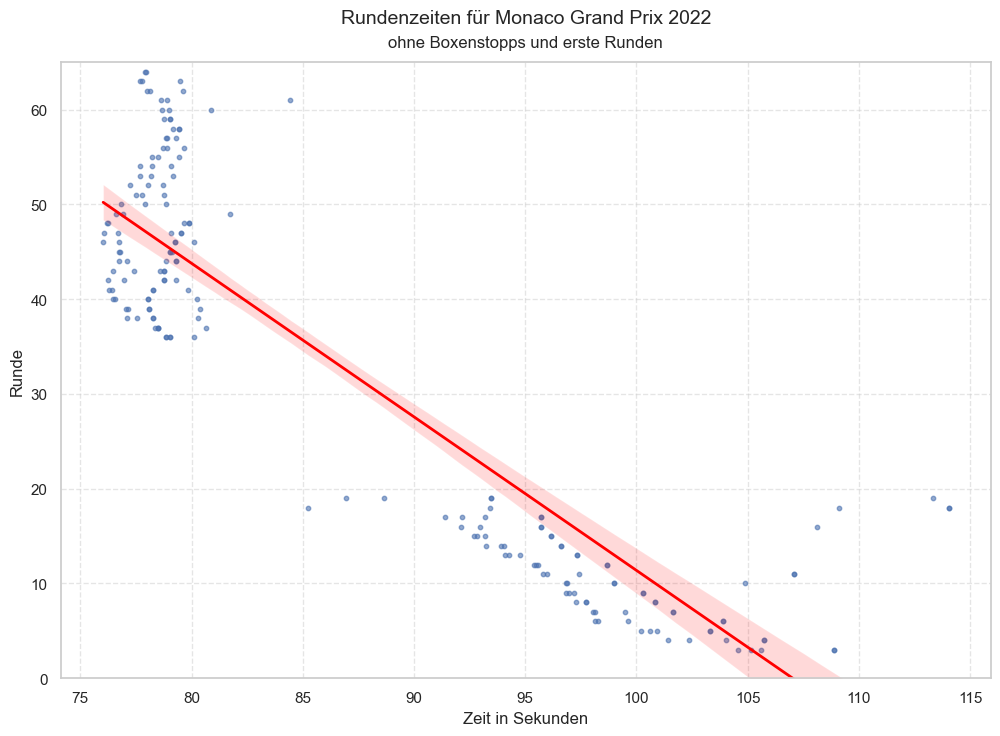

In [84]:
lap_times_filtered_no_box = lap_times_filtered[~((lap_times_filtered['lap'] >= 20) & (lap_times_filtered['lap'] <= 35))] # Erstelle den Scatterplot für die Teams mit getauschten Achsen
lap_times_filtered_no_box = lap_times_filtered_no_box[lap_times_filtered_no_box['lap'] > 2]


plt.figure(figsize=(12, 8))

# Scatterplot der Rundenzeiten in Sekunden auf der X-Achse und der Rundenanzahl auf der Y-Achse
sns.regplot(x=lap_times_filtered_no_box['milliseconds'] / 1000, y=lap_times_filtered_no_box['lap'], 
            scatter_kws={'alpha':0.6, 's':10}, line_kws={'color': 'red', 'lw': 2})

# Titel und Achsenbeschriftungen hinzufügen
plt.title(f'Rundenzeiten für {grand_prix_name} {year}', fontsize=14, y= 1.05)
plt.xlabel('Zeit in Sekunden', fontsize=12)
plt.ylabel('Runde', fontsize=12)
plt.ylim(0, 65)

# Untertitel mit plt.text hinzufügen (direkt unter dem Haupttitel)
plt.text(0.5, 1.02, 'ohne Boxenstopps und erste Runden', ha='center', va='bottom', fontsize=12, transform=plt.gca().transAxes)

# Gitter hinzufügen
plt.grid(True, linestyle='--', alpha=0.5)

# Plot anzeigen
plt.show()


### Abbildung 13

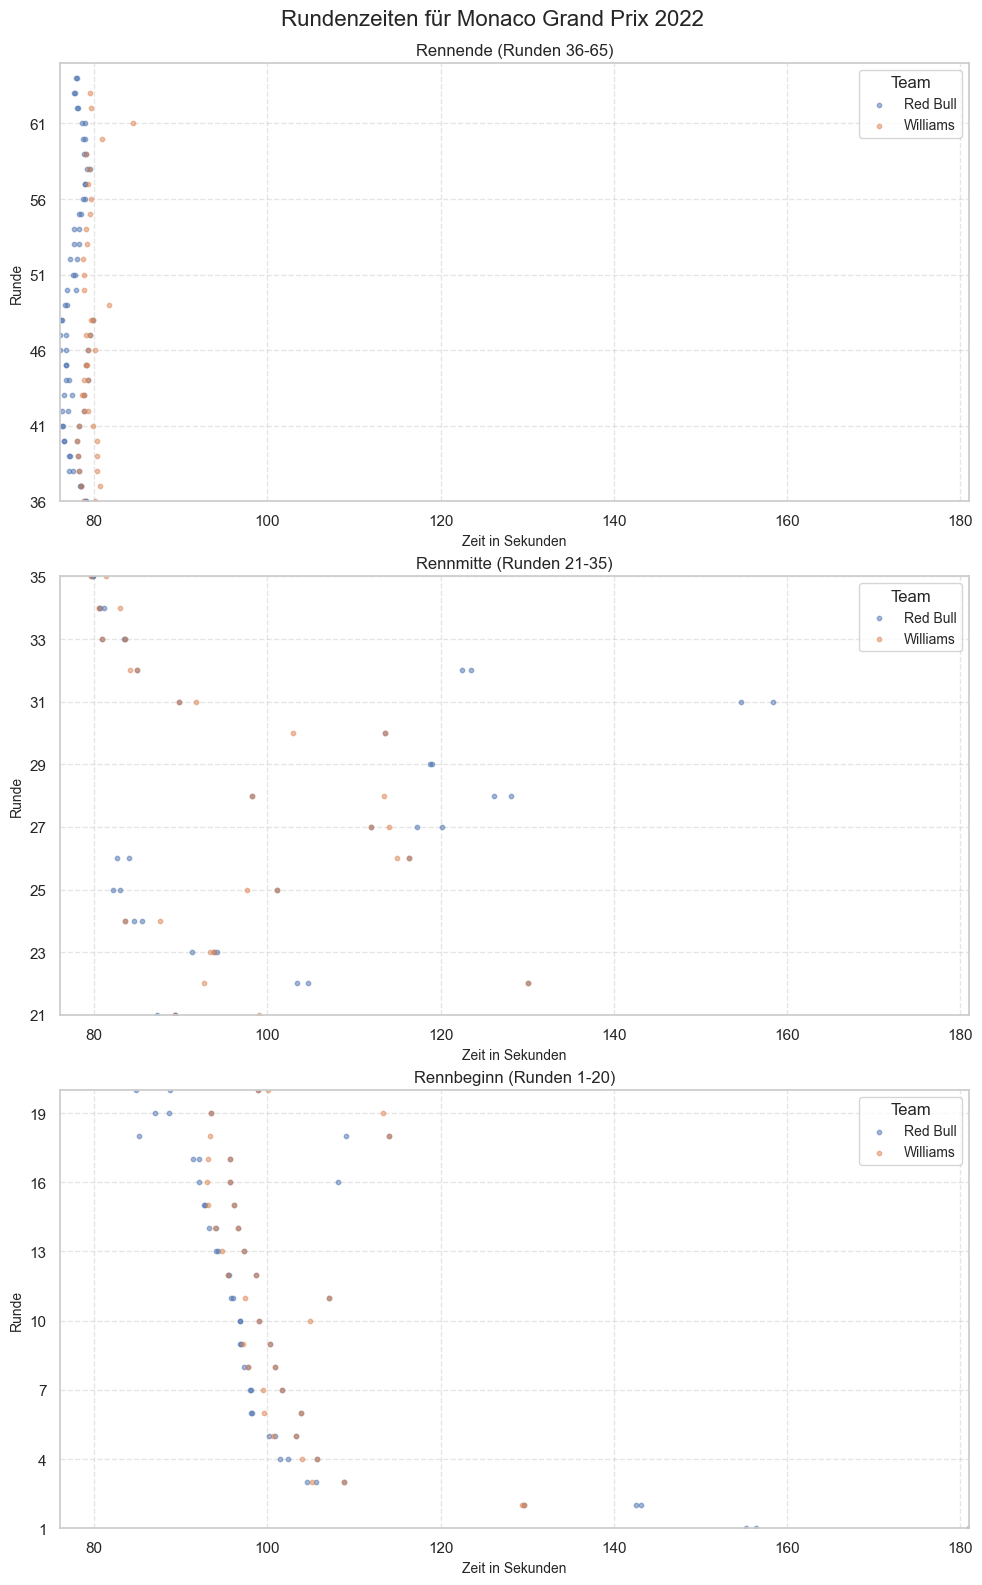

In [102]:
# Definiere die Rundenbereiche für die Subplots
middle_lap_start = 20
middle_lap_end = 35
end_lap = 65

# Erstelle die Subplots (3 vertikal untereinander)
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Funktion zur Berechnung der Y-Achse
def set_yaxis_ticks(ax, min_round, max_round):
    round_range = max_round - min_round
    # Bestimmen der "Skalierung" der Y-Achse, um sicherzustellen, dass größere Bereiche mehr vertikalen Raum erhalten
    tick_step = round_range // 5  # Definiere hier eine Zahl, um die Tick-Markierungen zu steuern
    ticks = range(min_round, max_round + tick_step, tick_step)  # Runden in Intervallen
    ax.set_yticks(ticks)
    ax.set_ylim(min_round, max_round)  # Dynamischer Bereich der Y-Achse

# Filtere und plotte die Daten für den Rennbeginn (erste 20 Runden)
for team in selected_teams:
    team_data_start = lap_times_filtered[lap_times_filtered['lap'] <= middle_lap_start]
    axs[2].scatter(team_data_start[team_data_start['Team'] == team]['milliseconds'] / 1000,
                   team_data_start[team_data_start['Team'] == team]['lap'], label=team, alpha=0.5, s=10)

axs[2].set_title(f'Rennbeginn (Runden 1-20)', fontsize=12)
axs[2].set_xlabel('Zeit in Sekunden', fontsize=10)
axs[2].set_ylabel('Runde', fontsize=10)
axs[2].grid(True, linestyle='--', alpha=0.5)
axs[2].legend(title='Team', fontsize=10)

# Setze die Y-Achse für den Rennbeginn
set_yaxis_ticks(axs[2], 1, middle_lap_start)

# Filtere und plotte die Daten für die Rennmitte (Runden 21-35)
for team in selected_teams:
    team_data_middle = lap_times_filtered[(lap_times_filtered['lap'] > middle_lap_start) & (lap_times_filtered['lap'] <= middle_lap_end)]
    axs[1].scatter(team_data_middle[team_data_middle['Team'] == team]['milliseconds'] / 1000,
                   team_data_middle[team_data_middle['Team'] == team]['lap'], label=team, alpha=0.5, s=10)

axs[1].set_title(f'Rennmitte (Runden 21-35)', fontsize=12)
axs[1].set_xlabel('Zeit in Sekunden', fontsize=10)
axs[1].set_ylabel('Runde', fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend(title='Team', fontsize=10)

# Setze die Y-Achse für die Rennmitte
set_yaxis_ticks(axs[1], middle_lap_start + 1, middle_lap_end)

# Filtere und plotte die Daten für das Rennende (Runden 36-65)
for team in selected_teams:
    team_data_end = lap_times_filtered[lap_times_filtered['lap'] > middle_lap_end]
    axs[0].scatter(team_data_end[team_data_end['Team'] == team]['milliseconds'] / 1000,
                   team_data_end[team_data_end['Team'] == team]['lap'], label=team, alpha=0.5, s=10)

axs[0].set_title(f'Rennende (Runden 36-65)', fontsize=12)
axs[0].set_xlabel('Zeit in Sekunden', fontsize=10)
axs[0].set_ylabel('Runde', fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend(title='Team', fontsize=10, loc='upper right')

# Setze die Y-Achse für das Rennende
set_yaxis_ticks(axs[0], middle_lap_end + 1, end_lap)

# Achsen skalieren
# Hier definieren wir den gleichen Bereich für die X-Achse (Zeit in Sekunden) in allen Subplots
min_time = lap_times_filtered['milliseconds'].min() / 1000  # Zeit in Sekunden
max_time = lap_times_filtered['milliseconds'].max() / 1000  # Zeit in Sekunden

# Setze den gleichen Bereich für die X-Achse in allen Subplots
for ax in axs:
    ax.set_xlim(min_time, max_time)  # gleiche Zeitachse

# Titel für das gesamte Diagramm hinzufügen
plt.suptitle(f'Rundenzeiten für {grand_prix_name} {year}', fontsize=16, y = 0.88)

# Layout anpassen, damit es nicht überlappt
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Plot anzeigen
plt.show()